In [95]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import cross_validation

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\Dell\miniconda3\envs\KV7006\lib\site-packages\sklearn\__init__.py)

In [23]:
pip install plotly.express

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
data=load_iris()
dataFrame=pd.DataFrame(data=data.data,columns=data.feature_names)
dataFrame['target']=data.target
dataFrame['Species'] = pd.Categorical.from_codes(data.target,data.target_names)
dataFrame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
iris=load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [63]:
# Visualization

px.violin(dataFrame['sepal length (cm)'])

In [64]:
px.scatter(dataFrame,x='sepal length (cm)',y='sepal width (cm)')`

In [65]:
dataFrame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [66]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int32   
 5   Species            150 non-null    category
dtypes: category(1), float64(4), int32(1)
memory usage: 5.7 KB


<AxesSubplot:>

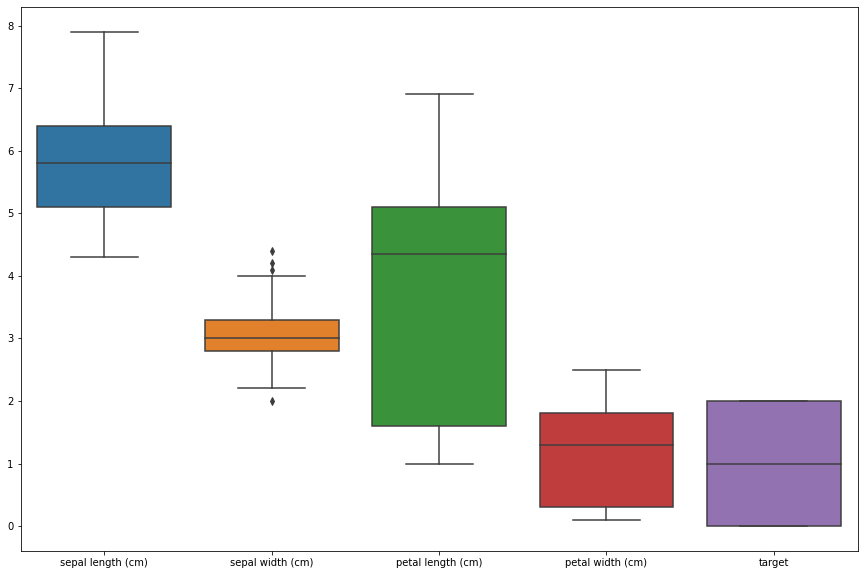

In [68]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dataFrame)

In [78]:
#target=dataFrame['target']
#dataFrame.drop(columns=['target','Species'],inplace=True)
dataFrame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
X_train,X_test,y_train,y_test=train_test_split(dataFrame,target,train_size=0.8,random_state=1234)
X_train.shape
X_test.shape
print(len(X_train))

120


In [82]:
# Use KFold Cross validation
num_instances=len(X_train)
num_folds=10
seed=1234
scoring='accuracy'


In [93]:
#Evaluate model to determine best Algorithm

models =[]
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('DC',DecisionTreeClassifier()))
models.append(('GB',GaussianNB()))
models.append(('SVM',svm.SVC()))
models.append(('LR',LogisticRegression()))

results,names=[],[]
for name,model in models:
    kfold=